<div style="background-color:purple; color:white; padding:8px; text-align: center;">
<h1>ANALISIS EXPLORATORIO DE LOS DATOS (EDA)</h1>
</div>

*El análisis exploratorio de datos es un proceso mediante el cual se examina y visualiza un conjunto de datos para comprender su estructura y patrones. Este proceso implica la identificación de valores atípicos, la búsqueda de relaciones entre variables y la exploración de la distribución de los datos.*

*En el caso de este dataset de películas tipo Netflix, el análisis exploratorio de datos podría ser útil para identificar patrones en las preferencias de los usuarios, tales como las películas más populares en determinadas regiones geográficas o géneros de películas que tienden a tener más éxito. También se podrían buscar relaciones entre el presupuesto de producción de una película y su éxito en términos de crítica o taquilla, y se podrían identificar posibles valores atípicos en el rendimiento de una película en particular en relación con sus pares del mismo género o de presupuesto similar.*

**1- Importamos librerias necesarias para el proceso de EDA**

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
import ast

**2-Cargamos y visualizamos el dataset Transformado en el ETL**

In [4]:
df_movies = pd.read_csv("movies_dataset transformado.csv", sep=",", low_memory=False )
df_movies.head(2)

,Unnamed: 0,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,title,vote_average,release_year,return,month,day
0,0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",en,21.946943,['Pixar Animation Studios'],['United States of America'],373554033.0,81.0,['English'],Toy Story,7.7,1995,12.451801,Octubre,Lunes
1,1,Sin dato,65000000.0,"['Adventure', 'Fantasy', 'Family']",en,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],262797249.0,104.0,"['English', 'Français']",Jumanji,6.9,1995,4.043035,Diciembre,Viernes


**3-Revisión exploratoria General**

In [9]:
#dimensiones del dataframe inicial
df_movies.shape

(45179, 17)

In [10]:
#Revisamos que tipo de dato es cada columna
df_movies.dtypes

Unnamed: 0                 int64
belongs_to_collection     object
budget                   float64
genres                    object
original_language         object
popularity               float64
production_companies      object
production_countries      object
revenue                  float64
runtime                  float64
spoken_languages          object
title                     object
vote_average             float64
release_year               int64
return                   float64
month                     object
day                       object
dtype: object

In [11]:
# Comprobamos la presencia de datos nulos en las columnas y fueron eliminados en el proceso de ETL
df_movies.isnull().sum()

Unnamed: 0                0
belongs_to_collection     0
budget                    0
genres                    0
original_language         0
popularity                0
production_companies      0
production_countries      0
revenue                   0
runtime                   0
spoken_languages          0
title                     0
vote_average              0
release_year              0
return                    0
month                    73
day                      73
dtype: int64

*Se puede evidenciar que las columnas estan sin nulos para ser trabajadas*

Se presentan 146 datos nulos


<Axes: >

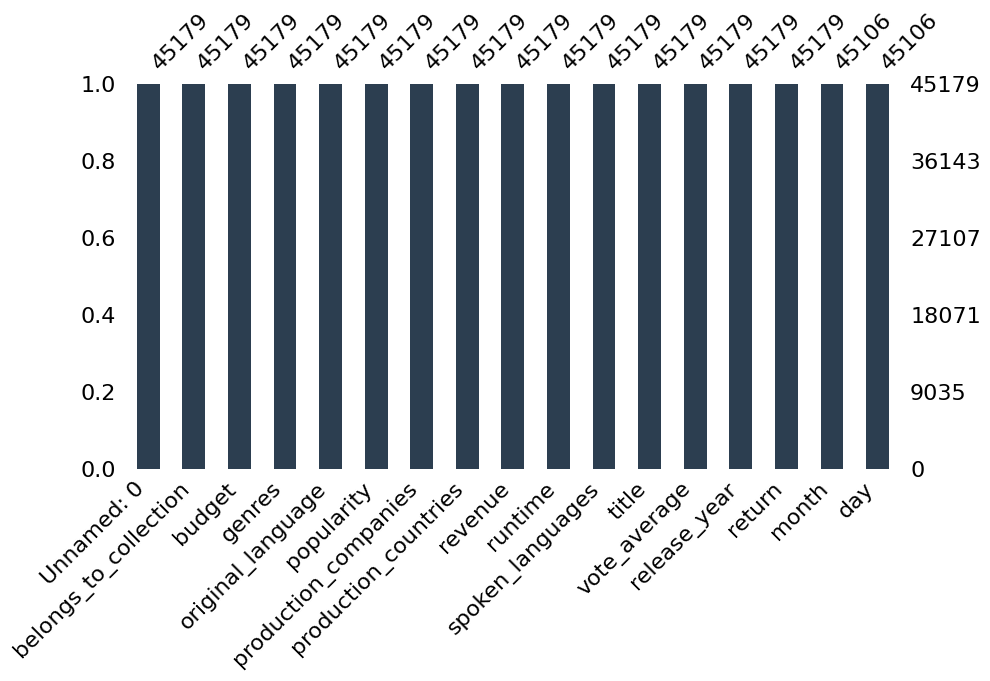

In [12]:
print("Se presentan", df_movies.isnull().sum().sum(), "datos nulos")
msno.bar(df_movies, figsize=(10, 5), color='#2c3e50')


No se evidencian nulos en ninguna instancia


<Axes: >

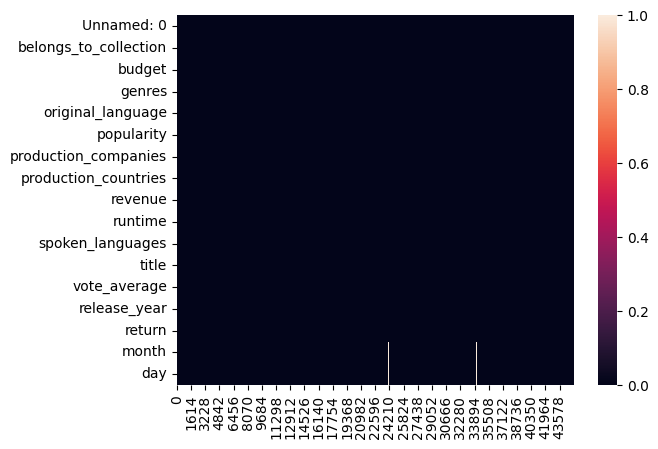

In [13]:
print("No se evidencian nulos en ninguna instancia")
df_movies.isnull().transpose().pipe(lambda df:(sns.heatmap(data=df)))

In [14]:
df_movies['popularity'] = df_movies['popularity'].astype(float)

*Comprobamos nuevamente la cantidad de nulos a nivel de dataset:*

In [15]:
df_movies.isnull().sum().sum()

146

**3-Analisis descriptivo - Estadisticos**

*En la descripción general de las variables numericas podemos evidenciar estadisticos importantes como: la media, la desviación estandar, los cuartiles(0.25,0.5,0.75), el valor maximo y minimo de cada columna:*

In [16]:
#Describimos las variables numericas de forma general

df_movies.describe(include=[np.number])


,Unnamed: 0,budget,popularity,revenue,runtime,vote_average,release_year,return
count,45179.000000,4.517900e+04,45179.000000,4.517900e+04,45179.000000,45179.000000,45179.000000,4.517900e+04
mean,22660.135173,4.250658e+06,2.937535,1.127898e+07,94.134399,5.629965,1988.638814,6.629209e+02
std,13111.492067,1.747565e+07,6.020153,6.452593e+07,38.406415,1.908179,83.538995,7.485596e+04
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,11300.500000,0.000000e+00,0.394193,0.000000e+00,85.000000,5.000000,1978.000000,0.000000e+00
50%,22631.000000,0.000000e+00,1.136222,0.000000e+00,95.000000,6.000000,2001.000000,0.000000e+00
75%,33999.500000,0.000000e+00,3.721882,0.000000e+00,107.000000,6.800000,2010.000000,0.000000e+00
max,45452.000000,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,2020.000000,1.239638e+07


*En las variables de tipo categorico visualizamos cantidad de datos totales, cantidad de datos unicos, la moda, y la frecuencia de esa moda para cada columna categorica:*

In [17]:
#Describimos las variables de tipo categorico

df_movies.describe(include=object)

,belongs_to_collection,genres,original_language,production_companies,production_countries,spoken_languages,title,month,day
count,45179,45179,45179,45179,45179,45179,45179,45106,45106
unique,1693,4058,89,22604,2384,1839,42016,12,7
top,Sin dato,['Drama'],en,Sin dato,['United States of America'],['English'],Cinderella,Enero,Viernes
freq,40696,4967,32254,11702,17842,22383,11,5865,13838


**3.1-Valores atipicos en columnas numericas**

*3.1.1-Columna "budget" --> El presupuesto de la película, en dólares*

*En esta columna el rango intercuartílico (IQR) es cero significa que el 50% de los datos están concentrados en un solo valor o pocos valores, lo que indica que hay una falta de variabilidad en los datos. Cuando el rango intercuartílico deja de ser cero a partir del cuartil 0.81, significa que el 81% de los datos se concentran en el 19% inferior del rango de valores posibles, lo que indica una fuerte asimetría a la izquierda en la distribución de los datos. Es decir, la mayoría de los datos se agrupan en valores bajos, mientras que hay muy pocos valores altos.*

*Análicemoslo con las siguientes gráficas:*

In [18]:
#1- Identifiquemos los valores atípicos en la columna "budget
lista_budget = np.array(df_movies["budget"])
q1 = np.quantile(lista_budget, 0.25)
q3 = np.quantile(lista_budget, 0.75)

iqr = q3 - q1

# Filtrar valores atípicos y guardarlos en una lista
outliers_budget = df_movies[(df_movies['budget'] < q1 - 1.5*iqr) | (df_movies['budget'] > q3 + 1.5*iqr)]['budget'].tolist()

print("El rango IQR es: ", iqr)

El rango IQR es:  0.0


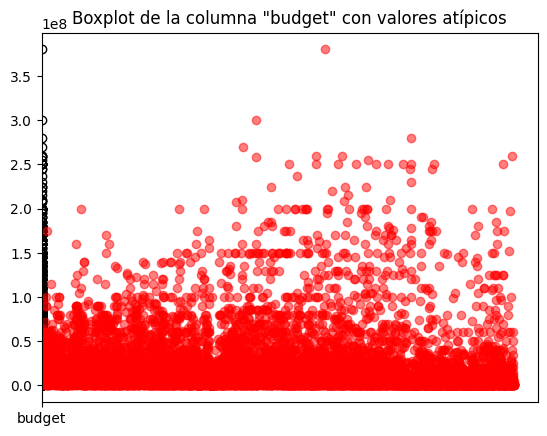

In [9]:
# Graficamos la columna "budget" en un diagrama de caja y bigotes
fig, ax = plt.subplots()
ax.boxplot(df_movies['budget'], whis=1.5)

# Marcar los valores atípicos con puntos rojos
ax.plot(range(1, len(outliers_budget)+1), outliers_budget, 'ro', alpha=0.5)

# Configurar la etiqueta del eje X y la etiqueta del gráfico
ax.set_xticklabels(['budget'])
ax.set_title('Boxplot de la columna "budget" con valores atípicos')
plt.show()

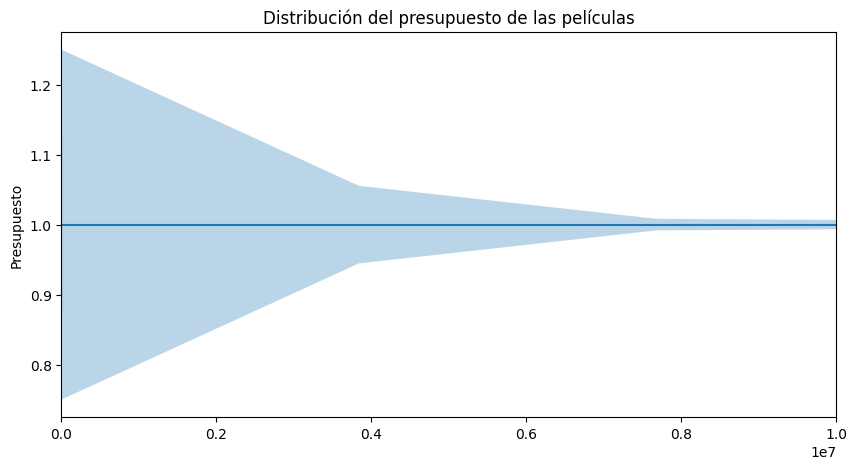

In [42]:
# Graficamos la columna "budget" en un gráfico de violin
#Observa como la mayoria de las peliculas tuvieron un presupuesto por debajo de los 10 millones de dolares
bw = 0.05
plt.figure(figsize=(10, 5))
plt.title('Distribución del presupuesto de las películas')
plt.ylabel('Presupuesto')
plt.violinplot(df_movies['budget'], vert=False, showmedians=True)
plt.xlim(0,10000000) #para acotar hasta 10 millones
plt.show()

*3.1.2-Columna "revenue" -->  Recaudación de la pelicula, en dolares*

*En esta columna el rango intercuartílico (IQR) es cero lo que significa que el 50% de los datos están concentrados en un solo valor o pocos valores, lo que indica que hay una falta de variabilidad en los datos. Cuando el rango intercuartílico deja de ser cero a partir del cuartil 0.84, significa que el 84% de los datos se concentran en el 16% inferior del rango de valores posibles, lo que indica una fuerte asimetría a la izquierda en la distribución de los datos. Es decir, la mayoría de los datos se agrupan en valores bajos, mientras que hay muy pocos valores altos.*

*Analicemoslo con las siguientes gráficas:*

In [20]:
# Identificamos valores atípicos en la columna "revenue" 
lista_revenue = np.array(df_movies["revenue"])
q1 = np.quantile(lista_revenue, 0.25)
print(q1)
q3 = np.quantile(lista_revenue, 0.75)
iqr = q3 - q1


# Filtrar valores atípicos y guardarlos en una lista
outliers_revenue = df_movies[(df_movies['revenue'] < q1 - 1.5*iqr) | (df_movies['revenue'] > q3 + 1.5*iqr)]['revenue'].tolist()
print("El rango IQR es: ", iqr)

0.0
El rango IQR es:  0.0


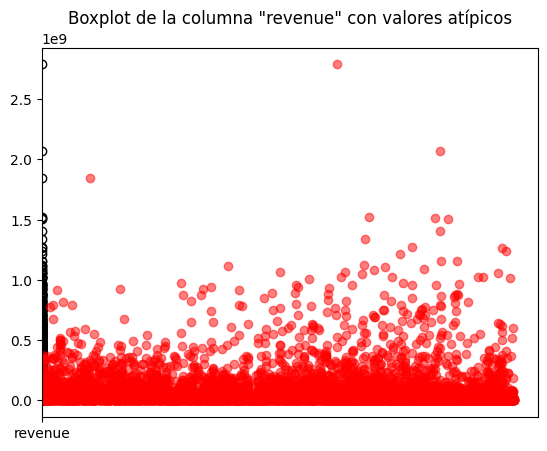

In [21]:
# Graficar con el diagrama de caja y bigotes
fig, ax = plt.subplots()
ax.boxplot(df_movies['revenue'], whis=1.5)

# Marcar los valores atípicos con puntos rojos
ax.plot(range(1, len(outliers_revenue)+1), outliers_revenue, 'ro', alpha=0.5)

# Configurar la etiqueta del eje X y la etiqueta del gráfico
ax.set_xticklabels(['revenue'])
ax.set_title('Boxplot de la columna "revenue" con valores atípicos')
plt.show()

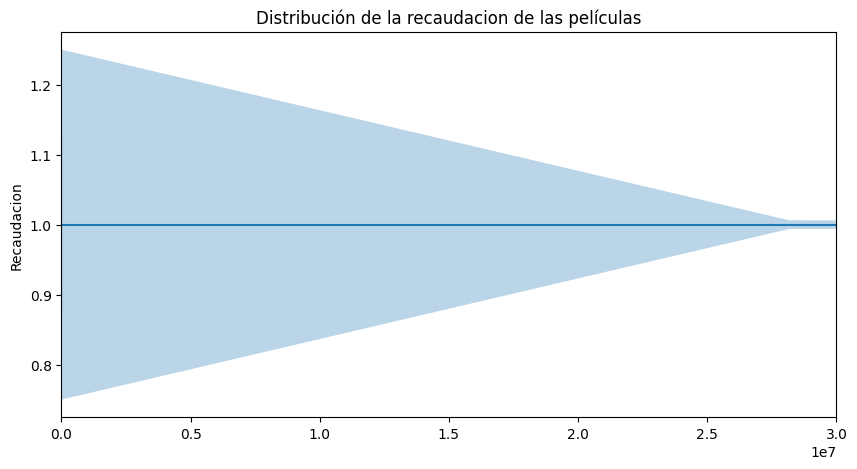

In [43]:
#Grafico de violin
#Observemos que la mayoria de las peliculas recaudaron por debajo de los 30 millones de dolares
bw = 0.05
plt.figure(figsize=(10, 5))
plt.title('Distribución de la recaudacion de las películas')
plt.ylabel('Recaudacion')
plt.violinplot(df_movies['revenue'], vert=False, showmedians=True)
plt.xlim(0,30000000) #para acotar eje a 30 millones
plt.show()

*3.1.3-Columna "runtime" --> Duración de la película, en minutos*

*La columna de duración de las películas muestra un IQR (rango intercuartil) de 22 minutos, lo que indica que el 50% de las películas tienen una duración que se encuentra entre 22 minutos por encima y por debajo de la mediana, que es de 95 minutos. Este resultado sugiere que la mayoría de las películas tienen duraciones similares, lo cual puede ser útil para los espectadores que quieren saber qué esperar de una película en términos de duración.*

*Analicemos con las siguientes gráficas:*

In [23]:
# Identificar valores atípicos en la columna "runtime" 
lista_runtime = np.array(df_movies["runtime"])
q1 = np.quantile(lista_runtime, 0.25)
q3 = np.quantile(lista_runtime, 0.75)
iqr = q3 - q1

# Filtrar valores atípicos y guardarlos en una lista
outliers_runtime = df_movies[(df_movies['runtime'] < q1 - 1.5*iqr) | (df_movies['runtime'] > q3 + 1.5*iqr)]['runtime'].tolist()
print("El rango IQR es: ", iqr)

El rango IQR es:  22.0


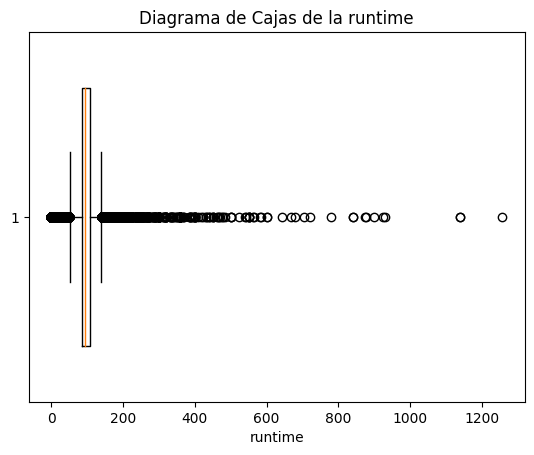

In [24]:
#Graficamos en un diagrama de cajas
plt.boxplot(df_movies['runtime'], vert=False, whis=1.5, widths=0.7, showfliers=True)
plt.xlabel('runtime')
plt.title('Diagrama de Cajas de la runtime')
plt.show()

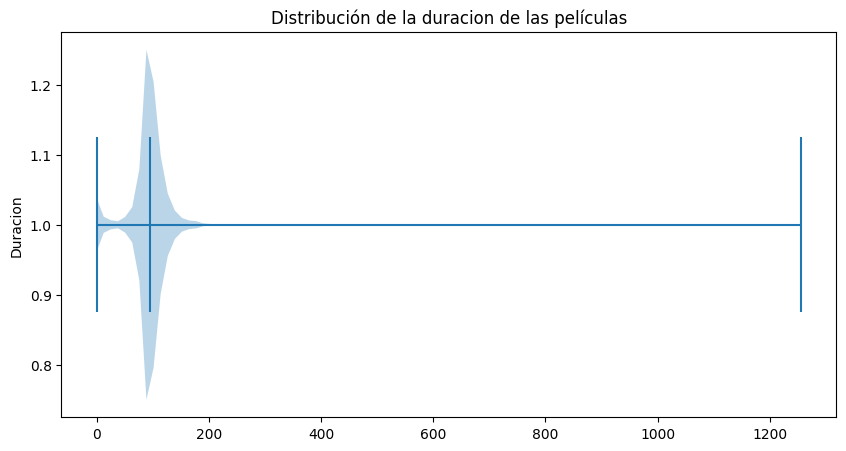

In [25]:
#la mayoria de las peliculas duran entre 68 y 117 minutos 
#Grafico de violin
bw = 0.05
plt.figure(figsize=(10, 5))
plt.title('Distribución de la duracion de las películas')
plt.ylabel('Duracion')
plt.violinplot(df_movies['runtime'], vert=False, showmedians=True)
#plt.xlim(68, 117)#para acotar
plt.show()

*3.1.4-Columna "vote_average" --> Puntaje promedio de reseñas de la pelicula*

*El IQR de 1.8 para el puntaje promedio de las reseñas de las películas indica que la mayoría de las películas tienen puntajes similares, con muy pocos casos extremos con puntajes muy altos o muy bajos. Este tipo de distribución puede ser útil para los espectadores que buscan una experiencia predecible en términos de calidad de las películas.*

*Analicemos con las siguientes gráficas*

In [26]:
# Identificar valores atípicos en la columna "vote_average" 
lista_vote = np.array(df_movies["vote_average"])
q1 = np.quantile(lista_vote, 0.25)
q3 = np.quantile(lista_vote, 0.75)
iqr = q3 - q1

# Filtrar valores atípicos y guardarlos en una lista
outliers_vote = df_movies[(df_movies['vote_average'] < q1 - 1.5*iqr) | (df_movies['vote_average'] > q3 + 1.5*iqr)]['vote_average'].tolist()
print("El valor de IQR es: ", round(iqr,2))

El valor de IQR es:  1.8


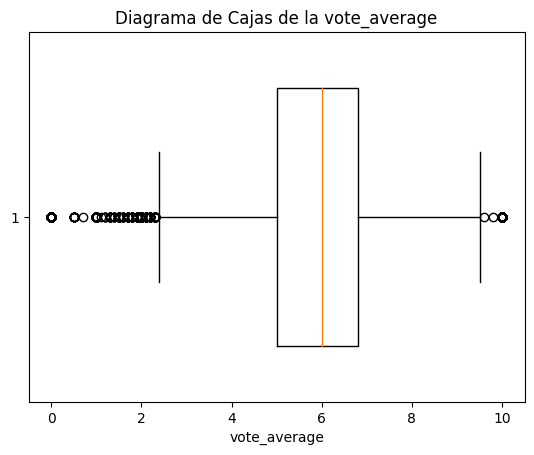

In [27]:
#Grafico de cajas
plt.boxplot(df_movies['vote_average'], vert=False, whis=1.5, widths=0.7, showfliers=True)
plt.xlabel('vote_average')
plt.title('Diagrama de Cajas de la vote_average')
plt.show()

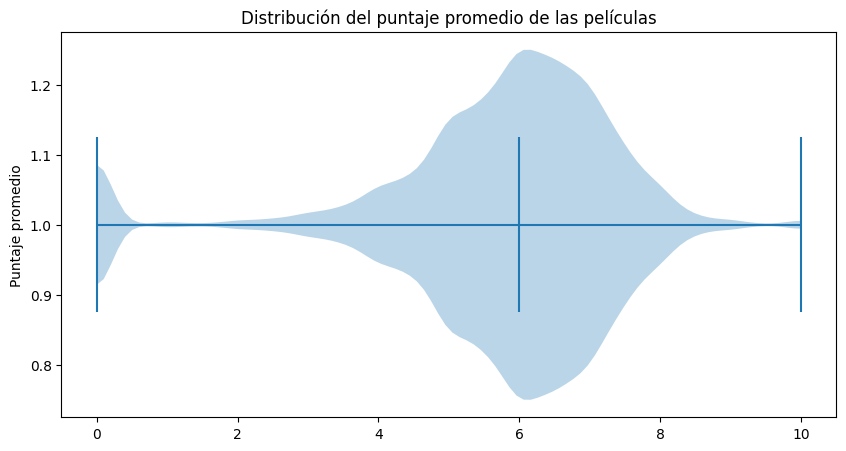

In [26]:
#Grafico de violin
#Observemos que la mayoria de peliculas tienen un puntaje entre 4 y 8
bw = 0.05
plt.figure(figsize=(10, 5))
plt.title('Distribución del puntaje promedio de las películas')
plt.ylabel('Puntaje promedio')
plt.violinplot(df_movies['vote_average'], vert=False, showmedians=True)
#plt.xlim(4,8)#para acotar eje
plt.show()

*3.1.5-Columna "released_year" -->  año de estreno de la pelicula*

*En cuanto a los años de estreno de las peliculas podemos evidenciar un crecimiento exponencial despúes del año 1920 hasta 2019 donde empieza a decrecer el numero*

*La tendencia de crecimiento podría explicarse por los avances tecnologicos en la producción y distribución de las peliculas, junto con los nuevos canales de distribución como el DVD, Blu-ray y plataformas de streaming en linea que ha permitido una mayor accesibilidad para el público y una mayor demanda de contenido*

*En cuanto a la disminución de peliculas después del 2019 podría deberse a factores como la pandemía del COVID-19 o también podría deberse a saturación del mercado y una mayor competencia entre los estudios del cine y las plataformas de streaming*

*Analicemos las gráficas:*

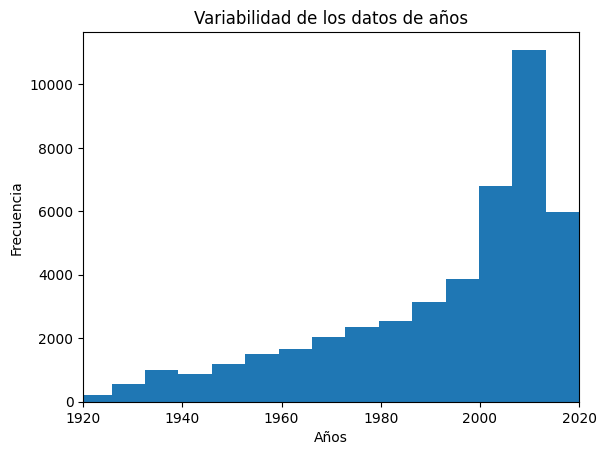

In [45]:
#la mayoria de peliculas fueron estrenadas entre 1920 - 2020
# filtrar los valores "Sin dato"
df_filtrado = df_movies[df_movies["release_year"] != 'Sin dato']
df_filtrado["release_year"] = pd.to_numeric(df_filtrado["release_year"], errors="coerce")


# crear un histograma con 20 bins
plt.hist(df_filtrado['release_year'], bins=300)

# agregar etiquetas y título
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.title('Variabilidad de los datos de años')
plt.xlim(1920,2020)

# mostrar la gráfica
plt.show()

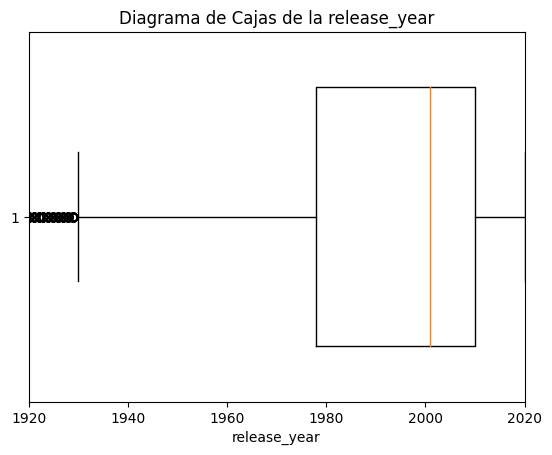

In [32]:
#Grafico de cajas
plt.boxplot(df_movies['release_year'], vert=False, whis=1.5, widths=0.7, showfliers=True)
plt.xlabel('release_year')
plt.title('Diagrama de Cajas de la release_year')
plt.xlim(1920,2020)
plt.show()

*3.1.6-Columna "return" -->  retorno de la inversión (revenue/budget)*

*En esta columna el rango intercuartílico (IQR) es cero lo que significa que el 50% de los datos están concentrados en un solo valor o pocos valores, lo que indica que hay una falta de variabilidad en los datos. Cuando el rango intercuartílico deja de ser cero a partir del cuartil 0.89, significa que el 89% de los datos se concentran en el 11% inferior del rango de valores posibles, lo que indica una fuerte asimetría a la izquierda en la distribución de los datos. Es decir, la mayoría de los datos se agrupan en valores bajos, mientras que hay muy pocos valores altos.*

In [33]:
# Identificar valores atípicos en la columna "return" 
lista_return = np.array(df_movies["return"])
q1 = np.quantile(lista_return, 0.25)
q3 = np.quantile(lista_return, 0.75)
iqr = q3 - q1

# Filtrar valores atípicos y guardarlos en una lista
outliers_return = df_movies[(df_movies['return'] < q1 - 1.5*iqr) | (df_movies['return'] > q3 + 1.5*iqr)]['return'].tolist()
print("El valor de IQR es: ", iqr)

El valor de IQR es:  0.0


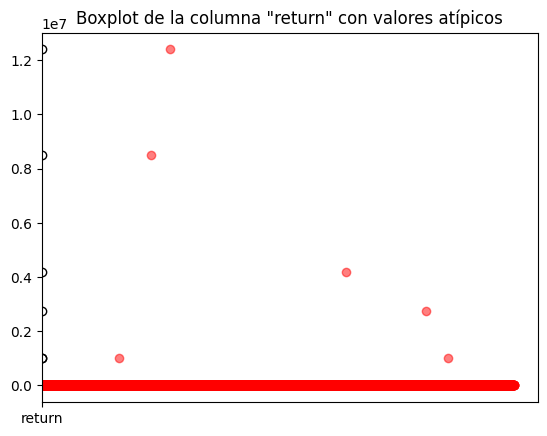

In [34]:
# Graficamos en el diagrama de caja y bigotes
fig, ax = plt.subplots()
ax.boxplot(df_movies['return'], whis=1.5)

# Marcar los valores atípicos con puntos rojos
ax.plot(range(1, len(outliers_return)+1), outliers_return, 'ro', alpha=0.5)

# Configurar la etiqueta del eje X y la etiqueta del gráfico
ax.set_xticklabels(['return'])
ax.set_title('Boxplot de la columna "return" con valores atípicos')
plt.show()

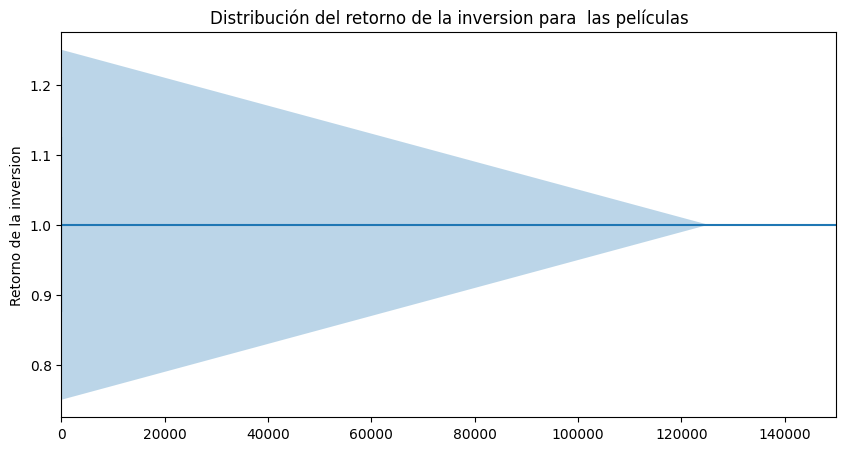

In [46]:
#la mayoria de peliculas tienen un retorno entre 0 y 120000
#Grafico de violin
plt.figure(figsize=(10, 5))
plt.title('Distribución del retorno de la inversion para  las películas')
plt.ylabel('Retorno de la inversion')
plt.violinplot(df_movies['return'], vert=False, showmedians=True)
plt.xlim(0,150000)#para acotar eje para 15 millones
plt.show()

**4.Correlación entre las variables**

*Evidenciemos que las columnas numericas con una correlacion fuerte son revenue y budget de 0.77 lo que significa que para un proyecto de machine learning cualquiera de las dos podría representar los datos, en este caso particular sería más conveniente eliminar budget pues presenta muchos valores nulos*

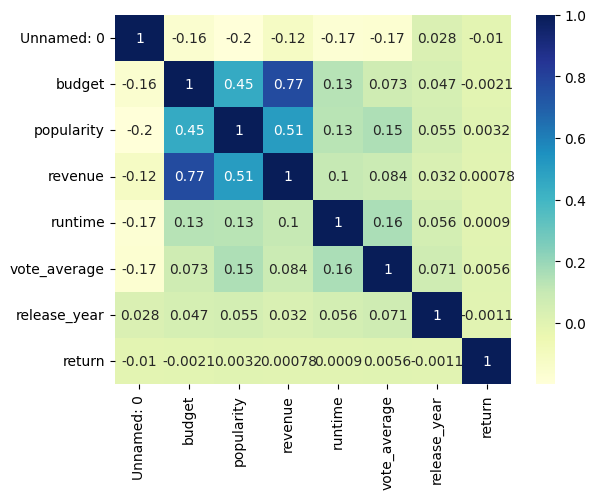

In [32]:
# correlacion entre variables numericas

df_numeric = df_movies.select_dtypes(include='number')

# Crear una matriz de correlación
corr_matrix = df_numeric.corr()

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True)

# Mostrar el mapa de calor
plt.show()

*Ahora visualicemos las relaciones entre pares de variables numéricas y una etiqueta categorica,*
*para este caso haremos la correlación de las variables numericas contra la etiqueta "belongs_to_collection"*

*puedes cambiar la etiqueta a las otras variables categoricas: genres, id, original_language, overview, production_companies, production_countries, release_date, spoken_languages, status, tagline, title y ver como se relacionan*

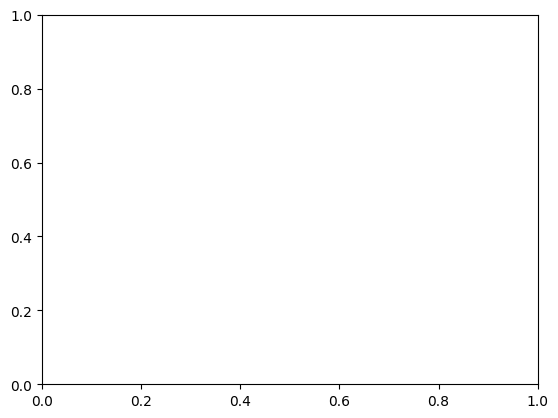

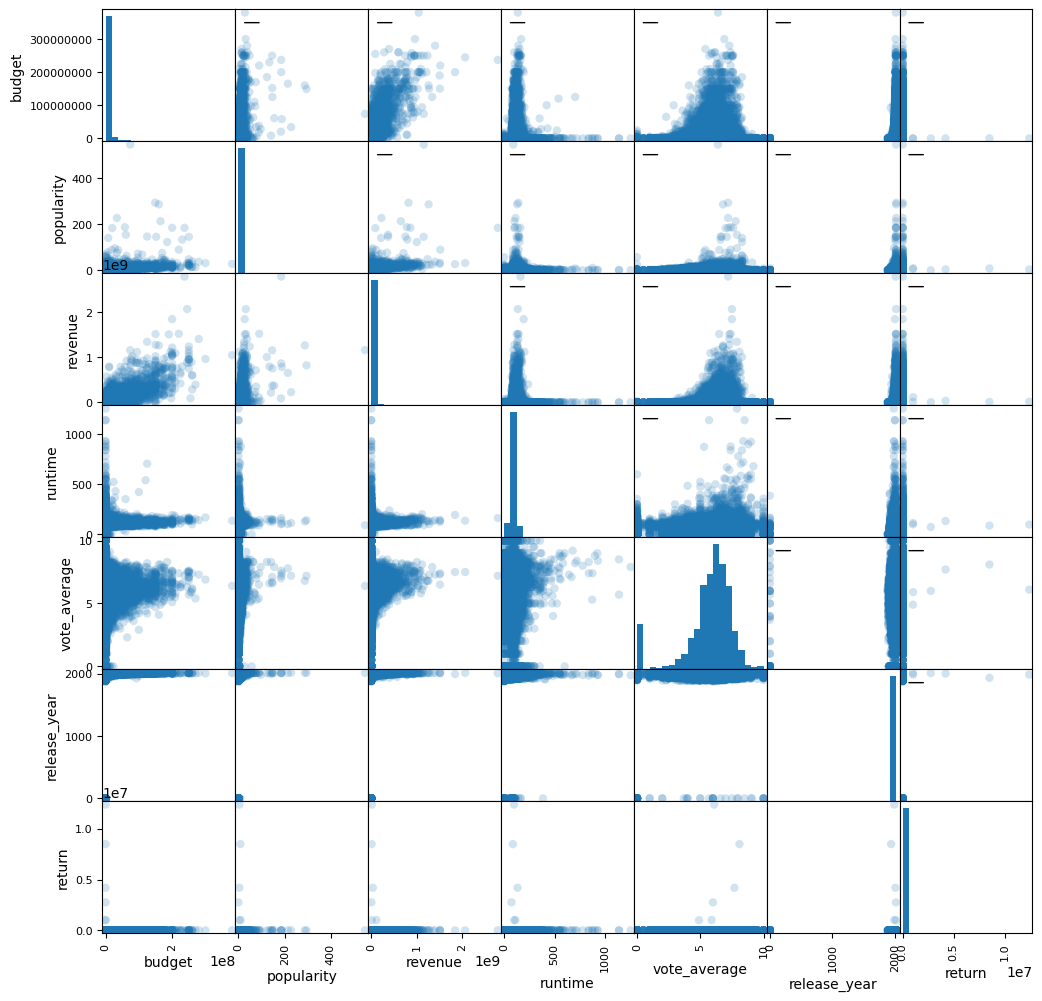

In [38]:
num_vars = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'release_year', 'return']
cat_var = 'belongs_to_collection'
data = df_movies[num_vars + [cat_var]]

# Crear el pairplot
fig, ax = plt.subplots()
ax = pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(12, 12), diagonal='hist', marker='o', grid=True, hist_kwds={'bins': 20})
for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
    ax[i, j].annotate("", xy=(0.05, 0.9), xycoords='axes fraction', xytext=(0.2, 0.9), textcoords='axes fraction', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0."), size=10)
plt.show()

**5-Nube de palabras**

*Generaremos una nube de palabras a partir de la columna "title" del dataset de peliculas donde visualizaremos las palabras más frecuentes en los titulos de las peliculas, en cuanto más grande aparezca en el gráfico más frecuente es. Este gráfico es util para encontrar patrones y tendencias en el conjunto de datos, en este caso podremos saber los temas más comunes de las peliculas dispuestas en el dataset. Por ejemplo si se observan palabras relacionadas con el amor y el romance, podría indicar que las peliculas de ese genero son las más populares*

*Analiza el gráfico y saca tus conclusiones*

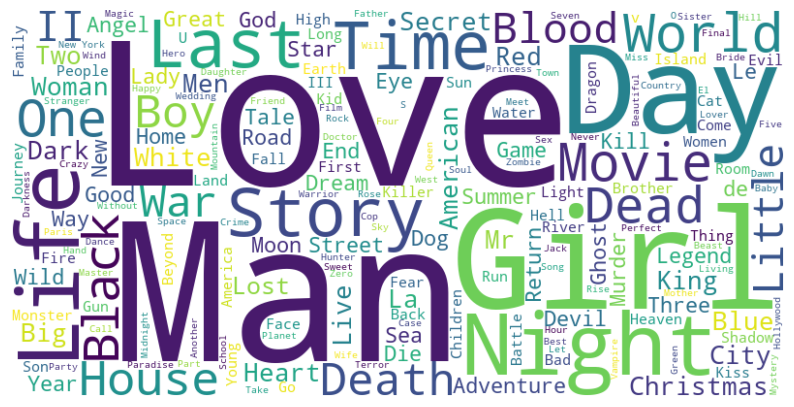

In [39]:
# Crear una lista de títulos de películas
titles = df_movies['title'].tolist()

# Unir todos los títulos en una sola cadena de texto
text = ' '.join(title for title in titles)

# Crear una nube de palabras con las palabras más frecuentes en los títulos
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras en una figura
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**6-Otros análisis**

**6.1-Analicemos como se comporta el presupuesto vs la recaudación en las peliculas**

*De forma rápida podemos evidenciar lo siguiente:*   

- *La mayoría de las películas no logran recuperar lo presupuestado con la recaudación. Esto puede indicar que el proceso de producción y distribución de las películas es costoso y que el riesgo financiero es alto para los productores.*

- *Hay muy pocas películas que superan lo presupuestado con la recaudación. Estas películas pueden considerarse excepcionales y tienen un gran impacto financiero en la industria del cine.*

- *Se puede deducir a partir de la gráfica que la mayoría de las películas tienen un presupuesto más alto que su recaudación. Esto sugiere que el éxito financiero de una película depende en gran medida de su capacidad para atraer al público y recuperar los costos de producción.*

- *La mayoría de las películas están en la zona inferior derecha de la gráfica, lo que indica que tienen un presupuesto bajo y una baja recaudación. Por otro lado, hay muy pocas películas en la zona superior derecha, lo que indica que tienen un alto presupuesto y una alta recaudación. Esto sugiere que hay una brecha significativa entre las películas que tienen éxito y las que no lo tienen.*

**Saca tus propias conclusiones:**

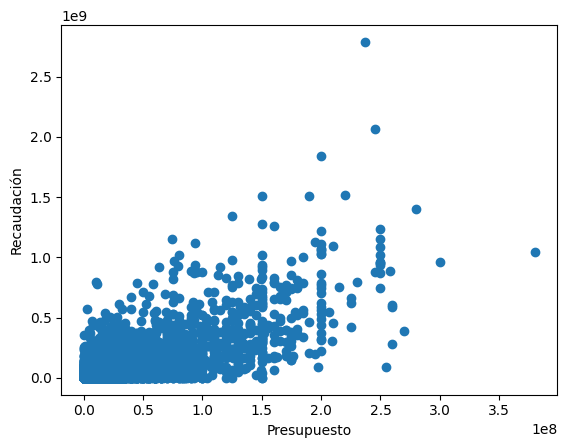

In [40]:
plt.scatter(df_movies['budget'], df_movies['revenue'])
plt.xlabel('Presupuesto')
plt.ylabel('Recaudación')
plt.show()

**6.2- Distribución de Peliculas producidas por país**

*Desde una perspectiva cinematográfica, este gráfico de torta muestra claramente que Estados Unidos es el líder indiscutible en la producción de películas, con casi el 40% de las películas en el conjunto de datos. Esto puede no ser sorprendente, ya que Hollywood es conocido en todo el mundo como la meca del cine. Sin embargo, también es interesante notar que Reino Unido sigue en segundo lugar con un 5% de las películas producidas, lo que sugiere que la industria cinematográfica británica sigue siendo fuerte.*

*Además, es fascinante ver la presencia de Francia, Japón e Italia en la lista de países productores de películas. Estos países tienen un legado cinematográfico importante y su presencia en el gráfico de torta sugiere que siguen siendo productores relevantes de películas de calidad.*

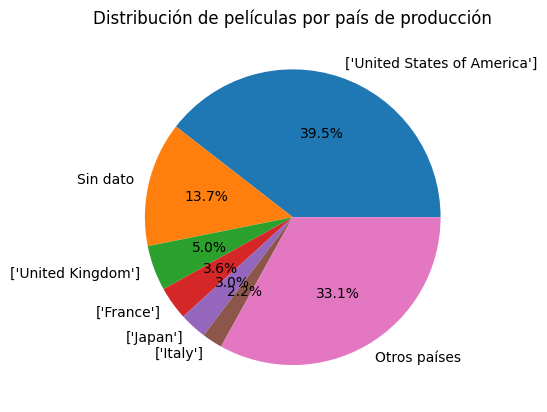

In [41]:
# Contar la cantidad de películas en cada país de producción
country_counts = df_movies['production_countries'].value_counts()

# Seleccionar los tres países más relevantes y agrupar el resto bajo la categoría "Otros países"
top_countries = country_counts[:6]
other_countries = pd.Series(country_counts[6:].sum(), index=['Otros países'])

# Concatenar los tres países más relevantes con la categoría "Otros países"
country_counts = pd.concat([top_countries, other_countries])

# Graficar la proporción de películas en cada país de producción
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Distribución de películas por país de producción')
plt.show()